In [38]:
import pandas as pd
dataset_url = 'https://sealevel-nexus.jpl.nasa.gov/data/ice_shelf_dh_mean_v1/ice_shelf_dh_mean_v1_height.csv'
dataset = pd.read_csv(dataset_url)
dataset.head()

,Year,Ross WAIS,Withrow,Sulzberger,Nickerson,Getz,Dotson,Crosson,Thwaites,Pine Island,...,Ross,Amundsen,Bellingshausen,Larsen,Filchner-Ronne,Queen Maud,Wilkes,West Antarctica,East Antarctica,All Antarctica
0,1994.038,0.169,2.581,-0.229,-0.261,1.362,3.128,3.569,3.463,1.790,...,0.177,2.136,0.924,0.452,-0.082,-0.169,-0.280,0.272,-0.091,0.144
1,1994.285,0.169,2.397,-0.144,-0.131,1.158,2.146,2.854,3.400,1.712,...,0.107,1.524,0.762,0.317,-0.170,-0.166,-0.074,0.193,-0.158,0.050
2,1994.534,0.169,1.270,-0.172,-0.173,1.228,2.198,2.223,3.259,1.159,...,0.096,1.557,0.744,0.426,-0.129,-0.082,-0.199,0.211,-0.115,0.077
3,1994.786,0.169,3.275,-0.246,-0.438,0.895,2.033,2.548,3.020,1.582,...,0.043,1.287,0.522,0.201,-0.173,-0.183,-0.180,0.109,-0.159,-0.000
4,1995.038,0.184,0.919,0.063,-0.011,1.401,2.530,3.597,3.676,1.885,...,0.078,1.806,0.824,0.595,-0.174,-0.190,-0.193,0.211,-0.149,0.065


In [39]:
import numpy as np
N=dataset.shape[0]
x=np.array(dataset['Year']).reshape([N,1])
y=np.array(dataset['All Antarctica']).reshape([N,1])
points=np.hstack([x,y])

Creating the Model - Least Squares Estimation
Solve the Least Squares Regression by Hand


In [40]:
x0 = np.sum(x**0)
x1 = np.sum(x**1)
x2 = np.sum(x**2)
x3 = np.sum(x**3)
x4 = np.sum(x**4)
yx0 = np.sum(y * x**0)
yx1 = np.sum(y * x**1)
yx2 = np.sum(y * x**2)

In [41]:
# Create 3rd order model matrices.
A = [[x0, x1, x2], [x1, x2, x3], [x2, x3, x4]]
B = [[yx0], [yx1], [yx2]]
# Obtain Model Coefficients
import numpy.linalg as lin
M = np.matmul(lin.inv(A), B)

Simulate the Estimated Curve

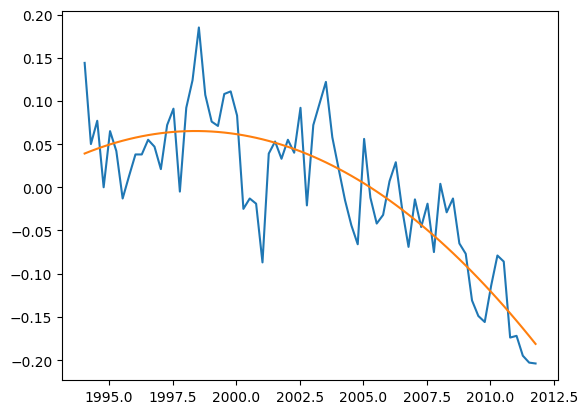

In [42]:
#To visualize the result, we can create y_estimated
import matplotlib.pyplot as plt
y_estimated = x**0 * M[0] + x**1 * M[1] + x**2 * M[2]
plt.plot(x, y, x, y_estimated)
plt.show()

Prediction of Future Values


In [43]:
y2020 = 2020**0 * M[0] + 2020**1 * M[1] + 2020**2 * M[2]

RMS Error

In [45]:
#To see the overall performance of the fit, we can simply take root-mean-square of the error.
rmse = (np.sum((yest - y) **2) / len(y)) ** 0.5

NameError: name 'yest' is not defined

In [46]:
rmse

0.5828191135755008